In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
 #sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
data_index=pd.read_csv('../data/out_csv/index_FRA.csv')

In [8]:
data_indicator=pd.read_csv('../data/out_csv/indicator_FRA.csv')

In [9]:
data_indicator=data_indicator.set_index('date')

In [10]:
data_indicator.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,
2020-02-15,0.026779,0.0124,0.0,12.0,1.0,1.0,1.0,0.02392,0.0,0.0,0.0,0.0
2020-02-16,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0
2020-02-17,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0
2020-02-18,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0
2020-02-19,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0


In [11]:
data_indicator.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
date,,,,,,,,,,,,
2020-02-15,0.026779,0.0124,0.0,12.0,1.0,1.0,1.0,0.02392,0.0,0.0,0.0,0.0
2020-02-16,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0
2020-02-17,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0
2020-02-18,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0
2020-02-19,0.026779,0.0124,0.0,12.0,0.0,1.0,0.0,0.02392,0.0,0.0,0.0,0.0


<AxesSubplot:>

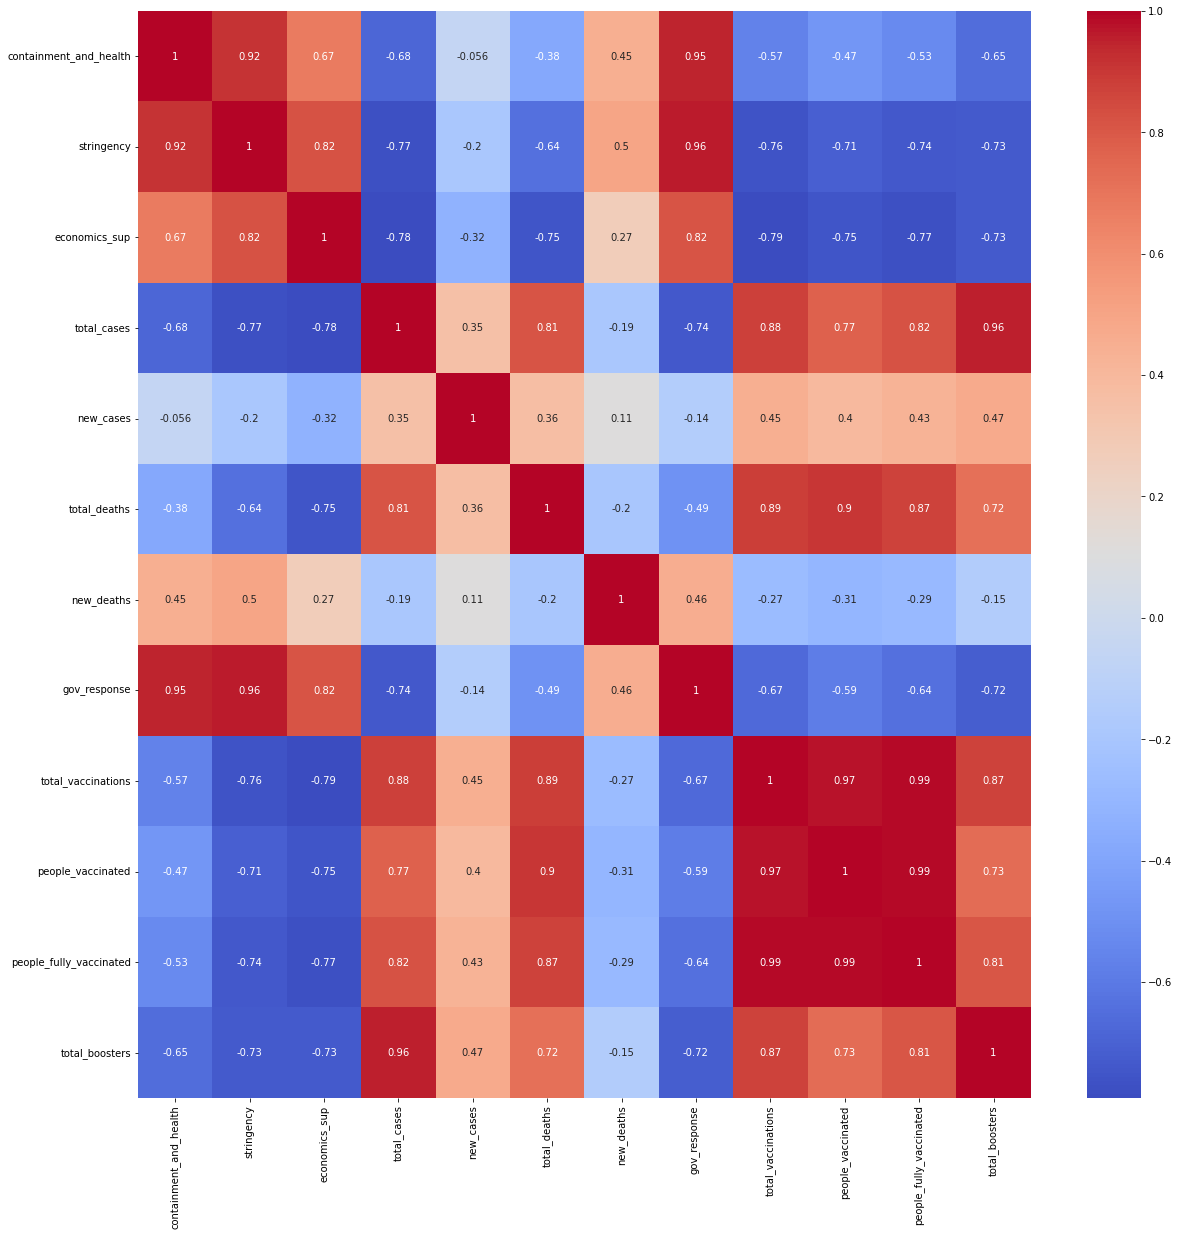

In [12]:
plt.figure(figsize = (20,20))

sns.heatmap(data_indicator.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

In [13]:
data_indicator['day-1']=data_indicator['total_deaths'].shift(periods=1)
data_indicator['day-2']=data_indicator['total_deaths'].shift(periods=2)
data_indicator['day-3']=data_indicator['total_deaths'].shift(periods=3)
data_indicator['day-4']=data_indicator['total_deaths'].shift(periods=4)
data_indicator['day-5']=data_indicator['total_deaths'].shift(periods=5)
data_indicator['day-6']=data_indicator['total_deaths'].shift(periods=6)
data_indicator['day-7']=data_indicator['total_deaths'].shift(periods=7)
data_indicator['day-8']=data_indicator['total_deaths'].shift(periods=8)
data_indicator['day-9']=data_indicator['total_deaths'].shift(periods=9)
data_indicator['day-10']=data_indicator['total_deaths'].shift(periods=10)
data_indicator['day-11']=data_indicator['total_deaths'].shift(periods=11)
data_indicator['day-12']=data_indicator['total_deaths'].shift(periods=12)
data_indicator['day-13']=data_indicator['total_deaths'].shift(periods=13)
data_indicator['day-14']=data_indicator['total_deaths'].shift(periods=14)
data_indicator['day-15']=data_indicator['total_deaths'].shift(periods=15)

In [14]:
data_indicator.columns

Index(['containment_and_health', 'stringency', 'economics_sup', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths', 'gov_response',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'total_boosters', 'day-1', 'day-2', 'day-3', 'day-4', 'day-5', 'day-6',
       'day-7', 'day-8', 'day-9', 'day-10', 'day-11', 'day-12', 'day-13',
       'day-14', 'day-15'],
      dtype='object')

In [139]:
data_indicator = data_indicator.fillna(0)

In [140]:
data_indicator.head()

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
X=data_indicator.drop(columns=['total_deaths','new_deaths','new_cases'])

In [142]:
X.head()

,cancel_public_events,school_closing,restrictions_on_gathering,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt/contract_relief,public_information_campaigns,...,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
y=data_indicator['total_deaths']
y

date
2020-01-30         1.0
2020-01-31         1.0
2020-02-01         1.0
2020-02-02         2.0
2020-02-03         2.0
                ...   
2022-09-02    205288.0
2022-09-03    205288.0
2022-09-04    205288.0
2022-09-05    205288.0
2022-09-06    205288.0
Name: total_deaths, Length: 951, dtype: float64

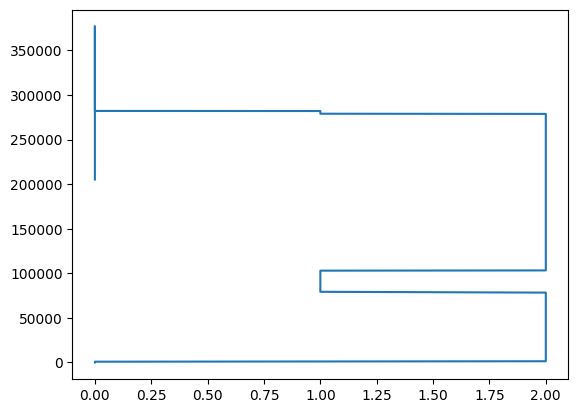

In [144]:
#plt.plot(X['cancel_public_events'],y)
#plt.plot(X['close_public_transport'],y)
plt.plot(X['international_travel_controls'],y)

In [145]:
scaler = MinMaxScaler()

In [146]:
scaler.fit(X)

MinMaxScaler()

In [147]:
X_scale=scaler.transform(X)

In [148]:
X_scale

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.9980819 , 0.99865417,
        0.99865417],
       [0.        , 0.        , 0.        , ..., 0.9980819 , 0.99865417,
        0.99865417],
       [0.        , 0.        , 0.        , ..., 1.        , 0.99865417,
        0.99865417]])

In [149]:
X_scale.shape

(951, 36)

In [150]:
y.shape

(951,)

In [151]:
X_train=X_scale[:761]
X_test=X_scale[761:]

In [153]:
y_train=y[:761]
y_test=y[761:]